# Microéconomie 5
## TD2 : L’équilibre concurrentiel dans une économie d’échange

### Exercice 1 : Préférences Cobb-Douglas

Les dotations initiales sont $\omega^A = (16, 4)$ et $\omega^B = (3, 6)$. Les agents ont les préférences

\begin{aligned}
    U^A(x^A) &= (x_1^A)^\frac{1}{2} (x_2^A)^\frac{1}{2} \\
    U^B(x^B) &= \frac{1}{2} \ln(x_1^B) + \frac{1}{4} \ln(x_2^B).
\end{aligned}
    
Le code suivant commence par définir ces données du problème.

**Dans le code ci-dessous, vous pouvez modifier librement les dotations $\omega^A$ et $\omega^B$ pour voir comment cela affecte les résultats.**

In [1]:
omegaA <- c(16, 4)                           # dotation initiale de A
omegaB <- c(3, 6)                            # dotation initiale de B
omega1 <- omegaA[1] + omegaB[1]              # dotation totale en bien 1
omega2 <- omegaA[2] + omegaB[2]              # dotation totale en bien 2
UA <- function(x1, x2) x1^(1/2) * x2^(1/2)   # fonction d'utilité de A
UB <- function(x1, x2) 1/2*log(x1) + 1/4*log(x2) # fonction d'utilité de B

Les préférences de $A$ sont manifestement des **préférences de Cobb-Douglas** : on sait désormais (depuis le TD1) qu'elles sont donc **convexes**.  
On remarque ensuite que l'utilité de $B$ s'obtient par une transformation monotone croissante d'une utilité Cobb-Douglas, puisque

\begin{equation}
    U^B(x^B) = \ln \left( (x_1^B)^\frac{1}{2} (x_2^B)^\frac{1}{4} \right)
\end{equation}

et la fonction $\ln$ est strictement croissante sur $\mathbf R_+^*$. L'utilité de $B$ représente donc aussi des préférences Cobb-Douglas, et ainsi les préférences de $B$ sont convexes également.

Représentons quand même la carte d'indifférence. Comme pour le TD1, je définis `x1` une série de valeurs de $x_1$ pour tracer les courbes, puis j'utilise les équations suivantes :
\begin{aligned}
    U^A(x^A) = U_0 &\iff x_2^A = \frac{(U_0)^2}{x_1^A} \\
    U^B(x^B) = U_0 &\iff x_2^B = \frac{\exp( 4 U_0)}{(x_1^B)^2}
\end{aligned}

pour définir deux fonctions `indiffA` et `indiffB` qui renvoient les points de la courbe d'indifférence associée à un niveau d'utilité `U` donné.

In [2]:
x1 <- seq(0, omega1, length=1000)

indiffA <- function(U) U^2/x1
indiffB <- function(U) exp(4*U)/x1^2

Je trace ensuite les courbes d'indifférence : celles de $A$ en bleu et celles de $B$ en orange.

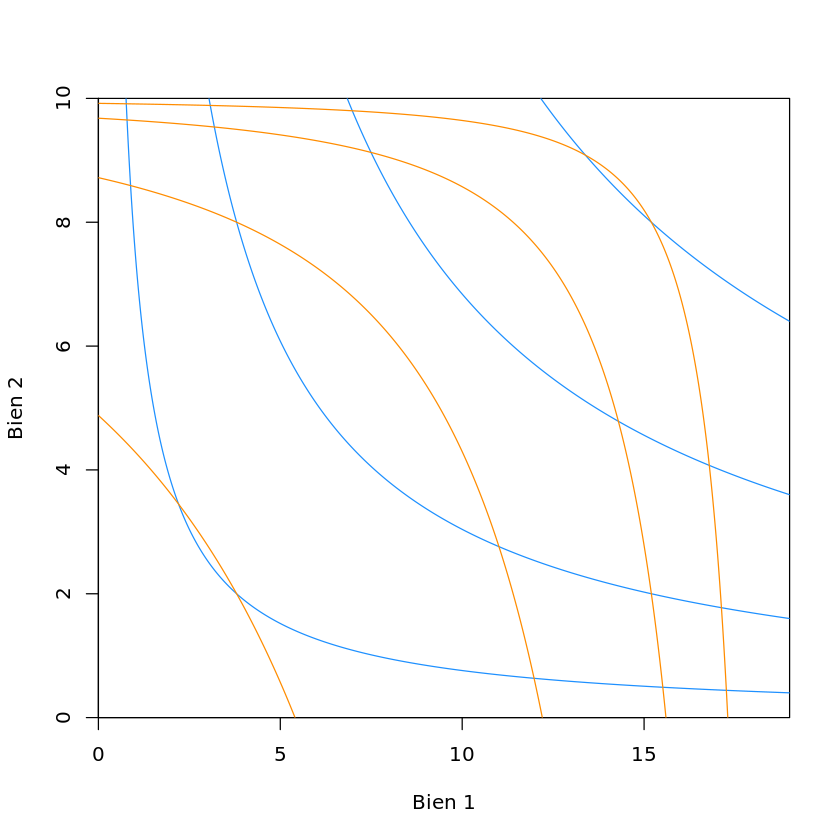

In [3]:
niveauxA <- seq(UA(omega1/5, omega2/5), UA(4*omega1/5, 4*omega2/5), len = 4)
niveauxB <- seq(UB(omega1/5, omega2/5), UB(4*omega1/5, 4*omega2/5), len = 4)

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", xlab = "Bien 1", ylab = "Bien 2", xaxs = "i", yaxs = "i")
for (U in niveauxA) lines(x1, indiffA(U), col = "dodgerblue", ylim = c(0, omega2))                # CI de A
for (U in niveauxB) lines(x1, rev(omega2 - indiffB(U)), col = "darkorange", ylim = c(0, omega2))  # CI de B

On cherche maintenant l'équilibre concurrentiel de cette économie. On doit donc suivre deux étapes : d'abord trouver les **fonctions de demande de chaque agent**, puis écrire l'**équilibre d'un des deux marchés de bien** (le deuxième marché sera alors automatiquement équilibré d'après la loi de Walras).

**1. Fonctions de demande**

Pour un vecteur de prix $p = (p_1, p_2)$ donné chaque agent forme ses demandes en maximisant son utilité sous sa contrainte de budget.  

Pour $A$, cela veut dire (rappel : $p \cdot x^A = p_1 x_1^A + p_2 x_2^A$)

\begin{equation}
    \max_{x^A} \; U^A(x^A) \qquad \text{s.c.} \; p \cdot x^A \leq p \cdot \omega^A.
\end{equation}

On forme le lagrangien de ce problème,
\begin{equation}
    \mathcal L(x^A, \mu) = (x_1^A)^\frac{1}{2} (x_2^A)^\frac{1}{2} + \mu(p_1 \omega_1^A + p_2 \omega_2^A - p_1 x_1^A - p_2 x_2^A)
\end{equation}

d'où on dérive les conditions du premier ordre
\begin{aligned}
    &\frac{1}{2} \frac{ (x_2^A)^\frac{1}{2} }{ (x_1^A)^\frac{1}{2} } - \mu p_1 = 0 \\
    &\frac{1}{2} \frac{ (x_1^A)^\frac{1}{2} }{ (x_2^A)^\frac{1}{2} } - \mu p_2 = 0 \\
    &p \cdot x^A = p \cdot \omega^A.
\end{aligned}

On en déduit
\begin{equation}
    \underbrace{\frac{x_2^A}{x_1^A}}_{= \mathsf{TMS}^A} = \frac{p_1}{p_2} \iff p_1 x_1^A = p_2 x_2^A
\end{equation}
puis on utilise enfin la contrainte de budget pour écrire
\begin{equation}
    p_1 x_1^A = p_2 x_2^A \iff 2 p_1 x_1^A = p \cdot \omega^A 
\end{equation}

d'où
\begin{equation}
    \boxed{ x_1^A(p) = \frac{p \cdot \omega^A}{2 p_1} }
    \quad \text{et} \quad
    \boxed{ x_2^A(p) = \frac{p \cdot \omega^A}{2 p_2} },
\end{equation}

c'est-à-dire que $A$ dépense $\frac{1}{2}$ de ses revenus en bien 1, et $\frac{1}{2}$ en bien 2 (on reconnaît les coefficients en exposant dans la fonction d'utilité de $A$).

Pour $B$ on suit le même raisonnement : on trouve
\begin{equation}
    \boxed{ x_1^B(p) = \frac{2 p \cdot \omega^B}{3 p_1} }
    \quad \text{et} \quad
    \boxed{ x_2^B(p) = \frac{p \cdot \omega^B}{3 p_2} }.
\end{equation}

De même, $B$ dépense $\frac{\frac{1}{2}}{\frac{1}{2} + \frac{1}{4}} = \frac{2}{3}$ de ses revenus en bien 1, et $\frac{\frac{1}{4}}{\frac{1}{2} + \frac{1}{4}} = \frac{1}{3}$ de ses revenus en bien 2.


**2. Équilibre du marché de bien 1**

À l'équilibre concurrentiel le marché du bien 1 doit être équilibré, soit

\begin{equation}
    x_1^A(p) + x_1^B(p) = \omega_1^A + \omega_1^B \iff \frac{p \cdot \omega^A}{2 p_1} + \frac{2 p \cdot \omega^B}{3 p_1} = \omega_1^A + \omega_1^B \iff \boxed{\frac{p_1}{p_2} = \frac{3 \omega_2^A + 4 \omega_2^B}{3 \omega_1^A + 2 \omega_1^B}} \overset{\text{A.N.}}{=} \frac{2}{3}.
\end{equation}

On en déduit enfin les allocations d'équilibre en réinjectant ce rapport de prix dans les demandes des agents :

\begin{equation}
    x_1^A = 11, \quad x_2^A = \frac{22}{3}, \qquad x_1^B = 8, \quad x_2^B = \frac{8}{3}.
\end{equation}

Représentons maintenant cet équilibre dans la boîte d'Edgeworth. Je définis en premier lieu les demandes de chaque agent selon le vecteur de prix `p` auquel ils font face, puis le rapport des prix à l'équilibre `r` selon la formule trouvée ci-dessus (la fonction `crossprod` correspond au produit scalaire).

In [4]:
x1A <- function(p) crossprod(p, omegaA)/(2*p[1])
x2A <- function(p) crossprod(p, omegaA)/(2*p[2])
x1B <- function(p) 2*crossprod(p, omegaB)/(3*p[1])
x2B <- function(p) crossprod(p, omegaB)/(3*p[2])
r <- (3*omegaA[2] + 4*omegaB[2])/(3*omegaA[1] + 2*omegaB[1])

Je définis l'allocation $I$ de départ, ainsi que l'allocation d'équilibre $E$ (j'utilise $p_1 =$ `r` et $p_2 = 1$).

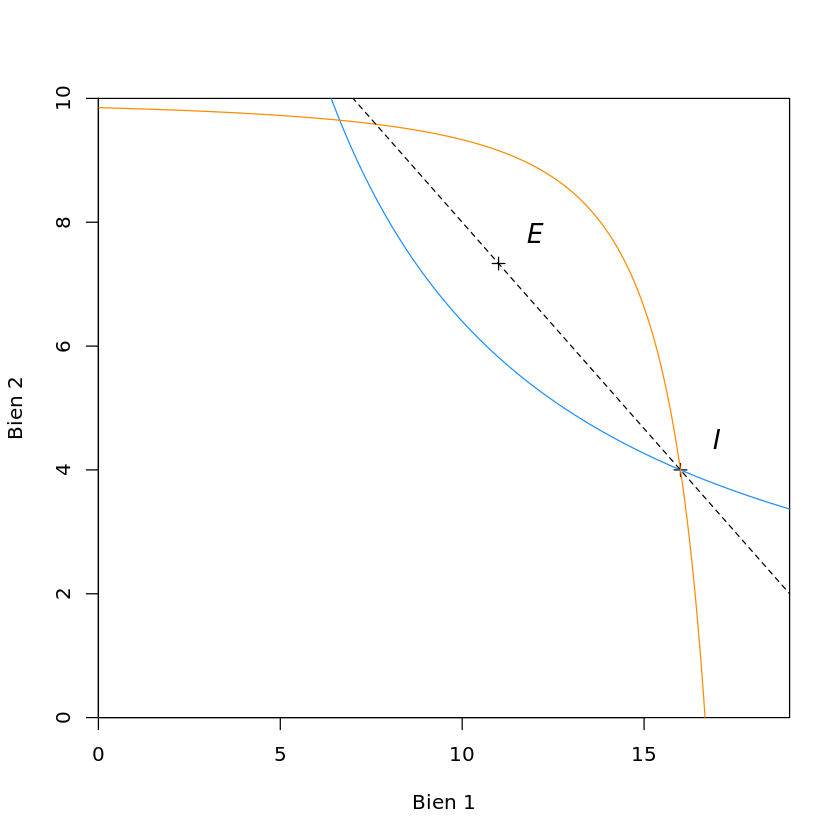

In [5]:
I <- omegaA                                   # dotations initiales
E <- c(x1A(c(r, 1)), x2A(c(r, 1)))            # équilibre concurrentiel

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                              # allocation initiale I
    text(I[1]+.05*omega1, I[2]+.05*omega2, labels = "I", cex = 1.3, font = 3)
lines(x1, indiffA(UA(I[1], I[2])), col = "dodgerblue", ylim = c(0, omega2))              # indifférence de A
lines(x1, rev(omega2 - indiffB(UB(omega1 - I[1], omega2 - I[2]))), col = "darkorange", ylim = c(0, omega2)) # indiff. B
#lines(x1, optima(x1), col = "purple", lwd = 1)  # courbe des optima
lines(x1, r*omegaA[1] + omegaA[2] - r*x1, lty = 2)                                       # contrainte de budget à l'équilibre
points(E[1], E[2], pch=3)                                                                # équilibre concurrentiel E
    text(E[1]+.05*omega1, E[2]+.05*omega2, labels = "E", cex = 1.3, font = 3)

Enfin, par curiosité, essayons de tracer la courbe des optima selon la méthode vue au TD1 (en violet ; je ne détaille pas ici le calcul de l'expression de cette courbe des optima).

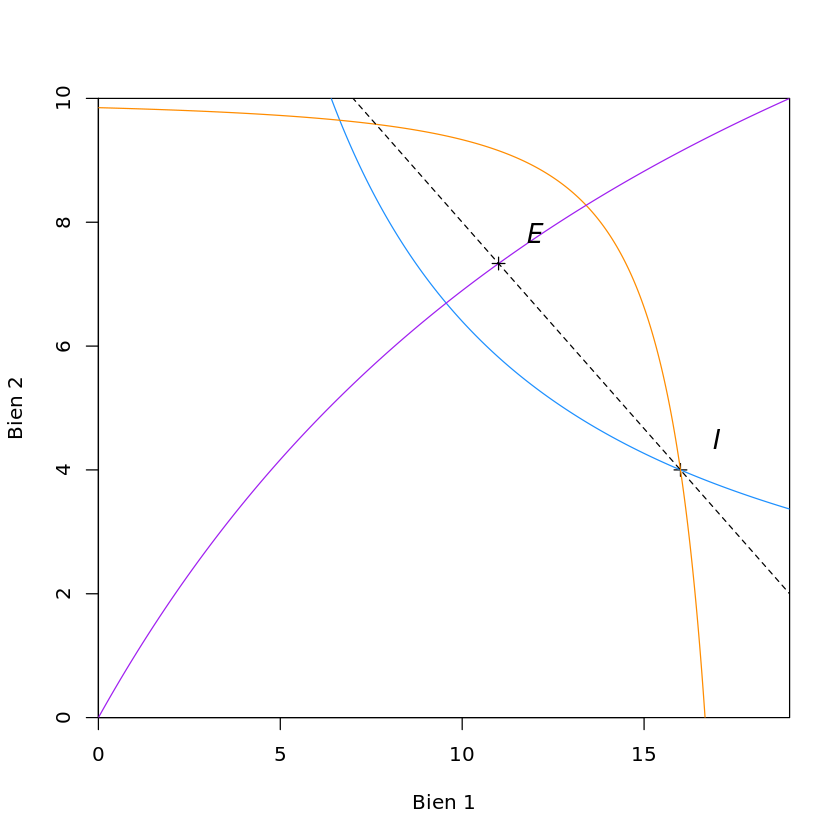

In [6]:
optima <- function(x) 2*x*omega2/(omega1 + x)

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                              # allocation initiale I
    text(I[1]+.05*omega1, I[2]+.05*omega2, labels = "I", cex = 1.3, font = 3)
lines(x1, indiffA(UA(I[1], I[2])), col = "dodgerblue", ylim = c(0, omega2))              # indifférence de A
lines(x1, rev(omega2 - indiffB(UB(omega1 - I[1], omega2 - I[2]))), col = "darkorange", ylim = c(0, omega2)) # indiff. B
lines(x1, optima(x1), col = "purple", lwd = 1)  # courbe des optima
lines(x1, r*omegaA[1] + omegaA[2] - r*x1, lty = 2)                                       # contrainte de budget à l'équilibre
points(E[1], E[2], pch=3)                                                                # équilibre concurrentiel E
    text(E[1]+.05*omega1, E[2]+.05*omega2, labels = "E", cex = 1.3, font = 3)

On voit que **l'allocation d'équilibre concurrentiel est en fait un optimum de Pareto !** C'est le premier théorème du bien-être, objet du TD suivant.